In [2]:
import numpy as np
import psutil
import matplotlib.pyplot as plt
import pandas as pd
import time
import sys
import tracemalloc

In [20]:
# 全部以读取大dataset为例  完整数据11G
fname='/media/xuweijia/DATA/代码/python_test/data/Criteo/kaggle-display-advertising-challenge-dataset/train.txt'

# txt文件读取

## f.read()：直接read. 默认size是-1。将全部内容放到一个字符串变量中

In [21]:
mem0=psutil.virtual_memory().used/1024**2   # M
with open(fname, 'rb') as f:                   # 大文件。
    s=f.read()                                 # 直接read. 默认size是-1。将全部内容放到一个字符串变量中
    mem = psutil.virtual_memory().used / 1024 ** 2
    del s     

In [23]:
print(mem-mem0,"M")

10595.78125 M


## for line in f:  等同于line=f.readline() 。内容按行返回，不会占用太多内存。但速度慢

In [55]:
mem0 = psutil.virtual_memory().used / 1024 ** 2   # 当前系统内存占用
mem_used=[]
n=100000
i=0
with open(fname, 'rb') as f:          # 按行迭代f。如果原始就是二进制写入的，可以直接读入。
    for line in f:                    # 内部逻辑等同于line=f.readline() 。内容是一行一行返回的，不会占用太多内存. 但可能慢很多
        line.strip()                  # 包括 "\n"。strip()一下
        mem = psutil.virtual_memory().used / 1024 ** 2
        mem_used.append(mem-mem0)     # 新增的内存占用.不会递增.比较稳定
        i+=1
        if(i==n):
            break

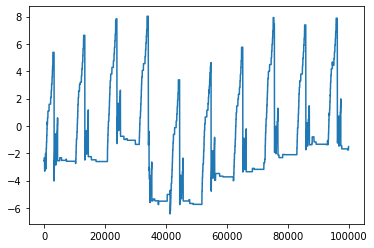

In [56]:
plt.plot(np.array(mem_used))

## f.read(block_size)： 流式处理，每次只读取一部分。适合流式统计一些内容

In [53]:
mem0 = psutil.virtual_memory().used / 1024 ** 2
mem_used=[]
n=100000
i=0
block_size = 1024 * 8                #  单位是字节。一个字母一个字节。每次读取8k字节。如果每次读一个字母，可以设置成1
with open(fname) as f:
    while True:
        chunk = f.read(block_size)   # 每次读取8k字节:8k个字母。
        if not chunk:                # 当文件没有更多内容时，read调用将会返回空字符串 ''
            break
        mem = psutil.virtual_memory().used / 1024 ** 2
        mem_used.append(mem-mem0)
        i+=1
        if(i==n):
            break

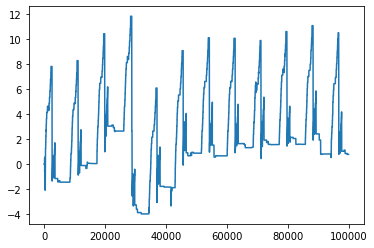

In [54]:
plt.plot(np.array(mem_used))

In [15]:
!python Mem_helper/readtext.py

Filename: /media/xuweijia/DATA/代码/python_test/pytorch_test/Mem_helper/readtext.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    19  39.6406 MiB  39.6406 MiB           1   @profile(precision=4)
    20                                         #@time_count
    21                                         def read():
    22  39.6406 MiB   0.0000 MiB           1       with open(fname, 'rb') as f:          # 大文件。
    23 10670.5391 MiB 10630.8984 MiB           1           s=f.read()                        # 直接read. 默认size是-1。将全部内容放到一个字符串变量中
    24  39.8125 MiB -10630.7266 MiB           1           del s                             # 用于从文件读取指定的字节数，如果未给定或为负则读取所有


Filename: /media/xuweijia/DATA/代码/python_test/pytorch_test/Mem_helper/readtext.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    26  39.8125 MiB  39.8125 MiB           1   @profile(precision=4)
    27                                         #@time_count
    28                                      

In [57]:
# 变量内存占用。 chunk相对固定8kb. line少
import sys 
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars'] 
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True) 

[('mem_used', 800984),
 ('chunk', 8241),
 ('line', 303),
 ('datafile', 278),
 ('fname', 278),
 ('f', 168),
 ('np', 72),
 ('plt', 72),
 ('block_size', 28),
 ('i', 28),
 ('n', 28),
 ('mem', 24),
 ('mem0', 24),
 ('mem_usg', 24),
 ('mem_usg_add', 24)]

# pd 切片读取

In [106]:
data_path='/media/xuweijia/DATA/代码/python_test/data/Criteo/demo_data/'
file_name='train.csv'

In [5]:
data_path='/media/xuweijia/新加卷/Kaggle数据集/h-and-m-personalized-fashion-recommendations/'
file_name='transactions_train.csv'

In [6]:
csv_file=data_path+file_name

## 全量读入

In [8]:
mem0=psutil.virtual_memory().used/1024**2   # M
t0=time.perf_counter()
raw_df = pd.read_csv(csv_file)
t1=time.perf_counter()
mem = psutil.virtual_memory().used / 1024 ** 2

In [9]:
print(mem-mem0,"M")  # 3G

-82.375 M


In [10]:
print(t1 - t0 ,"s")   # 18s

30.738636394999048 s


In [130]:
raw_df  # 3000万条

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [ ]:
del raw_df

## 全量读入+memorymap

In [148]:
mem0=psutil.virtual_memory().used/1024**2   # M
t0=time.perf_counter()
raw_df2 = pd.read_csv(csv_file,memory_map=True) # 文件映射，而不是都读到内存
t1=time.perf_counter()
mem = psutil.virtual_memory().used / 1024 ** 2

In [149]:
print(t1 - t0 ,"s")   # 18s

19.859657846005575 s


In [150]:
print(mem-mem0,"M")                             # 3G  感觉没啥用。都读进来了

2563.1640625 M


In [151]:
raw_df2

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [ ]:
del raw_df2

## 通过chunksize每次读取部分行。每个chunk仍是一个小df

In [137]:
n=10000
i=0
mem0 = psutil.virtual_memory().used / 1024 ** 2
mem_used=[]
t0=time.perf_counter()
with pd.read_csv(csv_file, chunksize=500) as reader:  # 返回的是一个迭代器，类型是TextFileReader
    for chunk in reader:                              # 每次顺序返回一个小df. 
                                                      # 是一个500行,带header小df.  内存维持在7M左右，不会一直涨
        i+=1
        mem = psutil.virtual_memory().used / 1024 ** 2 # 总的系统内存占用情况
        mem_used.append(mem-mem0)
        if i==n:
            break
t1=time.perf_counter()

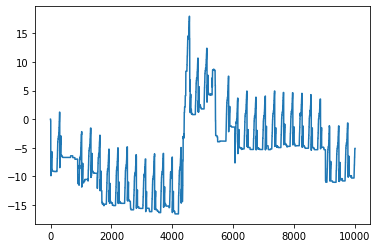

In [139]:
plt.plot(np.array(mem_used))   # M

In [140]:
print(t1 - t0 ,"s")   #  500万条的时间 总共需要60s. 慢3-4倍

10.737212966996594 s


In [138]:
chunk                                                   # 每个是一个500行,带header小df.  最后一个chunk是余数行的df

,t_dat,customer_id,article_id,price,sales_channel_id
4999500,2019-01-14,f99929aa796308ce14ef061bbb99a704966fa9aeb286cf...,753282001,0.040373,2
4999501,2019-01-14,f99929aa796308ce14ef061bbb99a704966fa9aeb286cf...,687176001,0.009678,2
4999502,2019-01-14,f9a2105543f7904a56b8b9564f870123b5c13fe236dbf8...,731661004,0.025407,2
4999503,2019-01-14,f9a2105543f7904a56b8b9564f870123b5c13fe236dbf8...,448509001,0.042356,2
4999504,2019-01-14,f9a2105543f7904a56b8b9564f870123b5c13fe236dbf8...,670698001,0.042356,2
...,...,...,...,...,...
4999995,2019-01-14,fcf51f908fbbffc364e570355e50a5a8ee412648118e45...,677672001,0.025407,2
4999996,2019-01-14,fcf51f908fbbffc364e570355e50a5a8ee412648118e45...,704849001,0.050831,2
4999997,2019-01-14,fcf51f908fbbffc364e570355e50a5a8ee412648118e45...,645965002,0.016932,2
4999998,2019-01-14,fcf51f908fbbffc364e570355e50a5a8ee412648118e45...,680316001,0.067780,2


In [142]:
chunk.describe()

,article_id,price,sales_channel_id
count,5.000000e+02,500.000000,500.00000
mean,6.205029e+08,0.025582,1.85400
std,1.087976e+08,0.018236,0.35346
min,1.115650e+08,0.000847,1.00000
25%,5.771750e+08,0.013542,2.00000
50%,6.522300e+08,0.022017,2.00000
75%,6.930718e+08,0.033881,2.00000
max,7.532820e+08,0.167797,2.00000


## 依然通过chunksize每次读取部分行。但设置memmap

In [11]:
n=10000
i=0
mem0 = psutil.virtual_memory().used / 1024 ** 2
mem_used=[]
t0=time.perf_counter()
with pd.read_csv(csv_file, chunksize=500,memory_map=True) as reader:  # 返回的是一个迭代器，类型是TextFileReader
    for chunk in reader:                                              # 500行的小df。带header
        i+=1
        mem = psutil.virtual_memory().used / 1024 ** 2                # 原始单位为字节
        mem_used.append(mem-mem0)
        if i==n:
            break
t1=time.perf_counter()

In [12]:
print(t1 - t0 ,"s")   #  500万条的时间 总共需要60s. 慢3-4倍

17.089813029997458 s


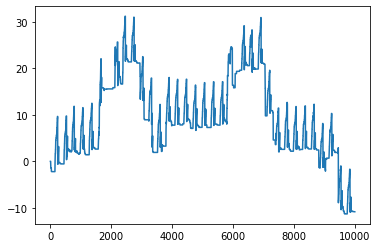

In [145]:
plt.plot(np.array(mem_used))   # M

In [ ]:
print(t1 - t0 ,"s")   #  500万条的时间

In [147]:
!python  -m memory_profiler Mem_helper/readdf.py

readall 20.021639823913574 s
Filename: Mem_helper/readdf.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    15    112.4 MiB    112.4 MiB           1   @profile
    16                                         def readall():
    17    112.4 MiB      0.0 MiB           1       t0=time.time()
    18   3284.1 MiB   3171.7 MiB           1       raw_df = pd.read_csv(csv_file)
    19   3284.1 MiB      0.0 MiB           1       raw_df.head(10)
    20   3284.1 MiB      0.0 MiB           1       t1=time.time()
    21   3284.1 MiB      0.0 MiB           1       print(sys._getframe().f_code.co_name, t1 - t0,"s")


readchunk 5.131388902664185 s
Filename: Mem_helper/readdf.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    23   1232.2 MiB   1232.2 MiB           1   @profile
    24                                         def readchunk():
    25   1232.2 MiB      0.0 MiB           1       n = 1000
    26   1232.2 MiB      0.0 MiB           1       i = 0
    27   1232

In [146]:
# 变量内存占用。字节数目。 chunk相对固定。单位是字节B
import sys 
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars'] 
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True) 

[('raw_df', 6739124832),
 ('chunk', 106148),
 ('mem_used', 85176),
 ('line', 303),
 ('datafile', 278),
 ('fname', 278),
 ('csv_file', 268),
 ('data_path', 224),
 ('file', 208),
 ('f', 168),
 ('np', 72),
 ('pd', 72),
 ('plt', 72),
 ('file_name', 71),
 ('reader', 48),
 ('block_size', 28),
 ('i', 28),
 ('n', 28),
 ('mem', 24),
 ('mem0', 24),
 ('mem_usg', 24),
 ('mem_usg_add', 24),
 ('t0', 24),
 ('t1', 24)]

In [3]:
sys.getsizeof(chunk)/1024**2        # 查看单个变量内存占用（函数同上）.字节（byte）为单位返回对象大小

# memmap


In [ ]:
# np.memmap:
# 内存映像文件是一种将磁盘上的非常大的二进制数据文件当做内存中的数组进行处理的方式 （但不真的读入。只读入用到的部分）
# 内存映射矩阵保留在磁盘上，无须全部读入。当只需要操作一部分，但不需要把全部文件都读入内存时，非常有用
# 操作起来和正常np.array一样（用了虚拟内存）
# Memory-mapped files are used for accessing small segments of large files on disk, 
# without reading the entire file into memory. NumPy’s memmap’s are array-like objects

## 读写方式 np.memmap

In [43]:
filename="my_np_mmap"
m=10000
n=10000
mmap = np.memmap(filename, dtype='float32', mode='w+', shape=(m,n)) # 在系统中创建了一个内存映射文件.Create or overwrite existing file

In [44]:
mmap[0,:]                                                           # 默认是0

memmap([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [45]:
mmap[0:5,:]=np.random.randn(5, 10000)                                # 赋值

In [46]:
mmap[0,:]                                                           # 此时写进去了。

memmap([-0.3902137,  0.6601213,  1.2107079, ..., -0.3137951, -0.8426623,
         1.0065947], dtype=float32)

In [48]:
del mmap                                                           # 垃圾回收时写入disk.也可以通过mmap.flush()主动写进disk

In [51]:
# 此时load
loadnp=np.memmap(filename,mode='r',shape=(m,n),dtype='float32')  # 必须指定shape和dtype. 否则认为是1维的.认为类似是uint8
loadnp[0,:]

memmap([-0.3902137,  0.6601213,  1.2107079, ..., -0.3137951, -0.8426623,
         1.0065947], dtype=float32)

In [52]:
loadnp

memmap([[-0.3902137 ,  0.6601213 ,  1.2107079 , ..., -0.3137951 ,
         -0.8426623 ,  1.0065947 ],
        [ 1.5626415 ,  0.26471403,  0.16404945, ..., -0.5765634 ,
         -0.9634148 , -0.51425654],
        [-1.162568  , -0.71099764,  0.37458193, ..., -1.1533709 ,
         -0.17299463,  1.5658019 ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]], dtype=float32)

## 读写方式2  npsave/npload(类似drml)

In [76]:
filename = "npsaved"
m=10000
n=10000
np.save(filename, np.zeros((m,n)))                  # 保存了大小和形状，数值类型

In [77]:
mem0 = psutil.virtual_memory().used / 1024 ** 2
loadmp1= np.load(filename+'.npy')                 
mem1 = psutil.virtual_memory().used / 1024 ** 2

In [78]:
mem1-mem0

764.1328125

In [83]:
mem0 = psutil.virtual_memory().used / 1024 ** 2
loadmp= np.load(filename+'.npy',mmap_mode='r+')    # 加载了大小和形状，数值类型
mem1 = psutil.virtual_memory().used / 1024 ** 2

In [84]:
mem1-mem0   # wow.wonderful  !!!

0.24609375

In [87]:
loadmp[0:10]

memmap([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [88]:
loadmp

memmap([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [93]:
loadmp[0:5,:]=np.random.randn(5, 10000)      # 赋值
loadmp[0:10]

In [90]:
del loadmp  # 写入

In [91]:
loadmp= np.load(filename+'.npy',mmap_mode='r') # 再次读进来 。 加载了大小和形状，数值类型
loadmp

memmap([[-0.18156335, -1.74712823,  1.20396165, ..., -1.19961551,
         -1.49786364,  0.38623364],
        [-0.76177157, -0.42613259, -0.63663856, ...,  1.85668382,
         -0.56252453, -0.02457226],
        [-1.02936229, -1.41631789, -0.64465088, ...,  0.94456772,
         -0.05339705, -0.49288251],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]])

## 通过np.lib.format.open_memmap/np.load读写

In [171]:
mem0 = psutil.virtual_memory().used / 1024 ** 2
filename="my_np_mmap_2"
m=10000
n=10000
mmap = np.lib.format.open_memmap(filename, dtype='float64', mode='w+', shape=(m,n))  # 也保存了大小和形状，数值类型
mem1 = psutil.virtual_memory().used / 1024 ** 2
del mmap

In [172]:
mem0 = psutil.virtual_memory().used / 1024 ** 2
loadmp= np.load(filename)                           # 直接读
mem1 = psutil.virtual_memory().used / 1024 ** 2

In [173]:
mem1-mem0

762.6875

In [174]:
mem0 = psutil.virtual_memory().used / 1024 ** 2
loadmp= np.load(filename ,mmap_mode='r+')     # 加载了大小和形状，数值类型  mmap读。很省内存
mem1 = psutil.virtual_memory().used / 1024 ** 2
mem1-mem0

0.0

In [175]:
loadmp[0:5,:]=np.random.randn(5, 10000)      # 赋值
del loadmp                                   # 写入

In [176]:
mem0 = psutil.virtual_memory().used / 1024 ** 2
loadmp= np.load(filename ,mmap_mode='r')         # 再次读进来 。 加载了大小和形状，数值类型
mem1 = psutil.virtual_memory().used / 1024 ** 2
mem1-mem0

-0.015625

In [177]:
loadmp

memmap([[-0.63687695,  1.15604202,  1.29428263, ..., -1.53747806,
         -0.79302619,  1.10401777],
        [-1.52443182,  1.15754185, -1.14825337, ...,  0.86032604,
         -0.4722343 , -0.44189387],
        [ 0.74912758,  0.91519773, -0.49865198, ...,  0.44452639,
          1.11968173, -2.18626822],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]])

## 写入大文件

In [179]:
import joblib
filename = "joblibfile"
m=100000
n=100000
joblib.dump(filename, np.zeros((m,n)))  # 写不进去

MemoryError: Unable to allocate 74.5 GiB for an array with shape (100000, 100000) and data type float64

In [126]:
filename = "npsavedBig"
m=100000
n=100000
np.save(filename, np.zeros((m,n)))  # 写不进去

MemoryError: Unable to allocate 74.5 GiB for an array with shape (100000, 100000) and data type float64

## mmep读写大文件

写入一个大文件。通过memmap读取。看内存增长

In [193]:
mem0 = psutil.virtual_memory().used / 1024 ** 2
filename="my_np_mmap_Big"
m=100000
n=100000
mmap = np.memmap(filename, dtype='float64', mode='w+', shape=(m,n))  # mmap 能写到磁盘 80G。但不存形状，类型
mem1 = psutil.virtual_memory().used / 1024 ** 2

In [194]:
mem1-mem0

3.53125

In [195]:
del mmap

载入以后用

In [212]:
mem0 = psutil.virtual_memory().used / 1024 ** 2
loadmp=np.memmap(filename,mode='r+',shape=(m,n),dtype='float64')  # 加载进来。必须指定shape和dtype. 否则认为是1维的.认为类似是uint8
mem1 = psutil.virtual_memory().used / 1024 ** 2

In [213]:
mem1-mem0

-0.015625

In [214]:
loadmp

memmap([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [215]:
# 赋值：
mem_used=[]
mem0 = psutil.virtual_memory().used / 1024 ** 2
for i in range(0,1000,1):                                       # 如果全部遍历。会奔溃。但选一部分不会
    loadmp[i:i+1,:]=np.ones((1,100000))
    mem1 = psutil.virtual_memory().used / 1024 ** 2
    mem_used.append(mem1-mem0)

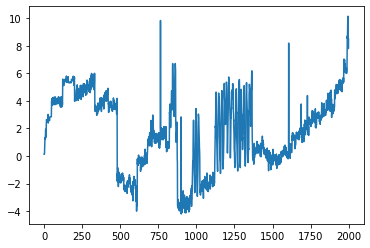

In [202]:
plt.plot(np.array(mem_used))   # M

In [203]:
# 再次载入
del loadmp
mem0 = psutil.virtual_memory().used / 1024 ** 2
loadmp=np.memmap(filename,mode='r',shape=(m,n),dtype='float32')  # 加载进来。必须指定shape和dtype. 否则认为是1维的.认为类似是uint8
mem1 = psutil.virtual_memory().used / 1024 ** 2
mem1-mem0

0.0

In [204]:
loadmp

memmap([[0.   , 1.875, 0.   , ..., 1.875, 0.   , 1.875],
        [0.   , 1.875, 0.   , ..., 1.875, 0.   , 1.875],
        [0.   , 1.875, 0.   , ..., 1.875, 0.   , 1.875],
        ...,
        [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ]], dtype=float32)

In [207]:
# 赋值给其他对象用
a=np.zeros((5,100000))
mem0 = psutil.virtual_memory().used / 1024 ** 2
mem_used=[]
for i in range(0,100000,5):
    a=loadmp[i:i+5,:]
    del a
    mem1 = psutil.virtual_memory().used / 1024 ** 2
    mem_used.append(mem1-mem0)

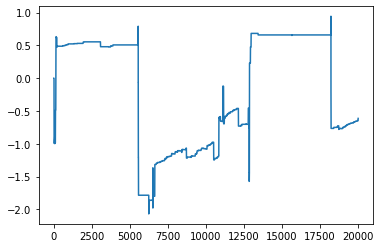

In [208]:
plt.plot(np.array(mem_used))   # M 内存一直在增加

In [209]:
a=np.zeros((5,100000))
mem0 = psutil.virtual_memory().used / 1024 ** 2
mem_used=[]
for i in range(0,100000,5):
    a=loadmp[i:i+5,:]
    del a
    mem1 = psutil.virtual_memory().used / 1024 ** 2
    mem_used.append(mem1-mem0)

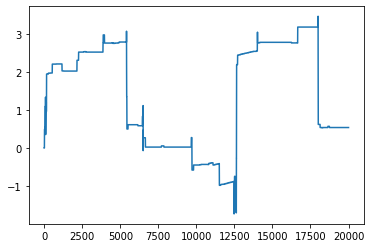

In [210]:
plt.plot(np.array(mem_used))

## np.lib.format.open_memmap+ np.load读写大np文件 推荐

In [11]:
mem0 = psutil.virtual_memory().used / 1024 ** 2
filename="my_np_mmap_Big2"
m=100000
n=100000
mmap = np.lib.format.open_memmap(filename, dtype='float64', mode='w+', shape=(m,n))  # 保存了形状，数值类型。能写入 80G
mem1 = psutil.virtual_memory().used / 1024 ** 2
del mmap

In [20]:
#loadmp=np.load(filename)                                       # 直接用np.load加载。失败

In [13]:
mem0 = psutil.virtual_memory().used / 1024 ** 2
loadmp=np.load(filename, mmap_mode='r+')                         # 用np.load + memmap加载
mem1 = psutil.virtual_memory().used / 1024 ** 2
mem1-mem0

-0.0234375

In [14]:
loadmp.shape                                                      # 保存了大数据shape.类型

(100000, 100000)

In [15]:
loadmp.dtype

dtype('float64')

In [40]:
# 赋值：
mem_used=[]
mem0 = psutil.virtual_memory().used / 1024 ** 2
for i in range(0,10000,1):
    loadmp[i:i+1,:]=np.ones((1,100000))                          # 只赋值一部分，内存不会奔溃。
                                                                 # 但被赋值的行越多，内存占用越多。被赋的所有行都在内存里了
    mem1 = psutil.virtual_memory().used / 1024 ** 2
    mem_used.append(mem1-mem0)

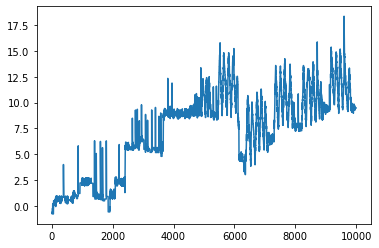

In [41]:
plt.plot(np.array(mem_used))   # M

In [30]:
del loadmp
mem0 = psutil.virtual_memory().used / 1024 ** 2
loadmp=np.load(filename, mmap_mode='r+')                # 再次加载进来
mem1 = psutil.virtual_memory().used / 1024 ** 2
mem1-mem0

0.0

In [38]:
# 赋值给其他对象用
a=np.zeros((1,100000))                                   # 只占这个大小的内存
mem0 = psutil.virtual_memory().used / 1024 ** 2
mem_used=[]
for i in range(0,10000,1):
    a=loadmp[i:i+1,:]                                    # 很稳定。如果只是用的话。只占a大小的内存。不随行数增加而变化
    mem1 = psutil.virtual_memory().used / 1024 ** 2
    mem_used.append(mem1-mem0)

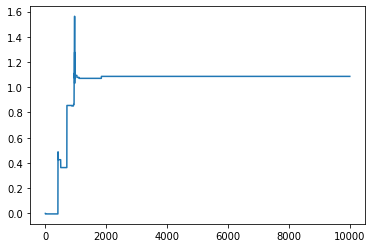

In [39]:
plt.plot(np.array(mem_used))   # M

In [42]:
loadmp

memmap([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
!python Mem_helper/readmmap.py

Filename: /media/xuweijia/DATA/代码/python_test/pytorch_test/Mem_helper/readmmap.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    11    110.9 MiB    110.9 MiB           1   @profile
    12                                         def npload():   # 被赋的行越多，内存占用越多。被赋的所有行都在内存里了
    13                                             # 载入
    14    110.9 MiB      0.0 MiB           1       filename = "my_np_mmap_Big2"
    15    110.9 MiB      0.0 MiB           1       loadmp = np.load(filename, mmap_mode='r+')
    16                                             # 赋值：
    17   7741.0 MiB      0.0 MiB       10001       for i in range(0, 10000, 1):
    18   7741.0 MiB   7630.2 MiB       10000           loadmp[i:i + 1, :] = np.ones((1, 100000))  # 只赋值一部分，内存不会奔溃。但遍历的越多，内存占用越多
    19    111.7 MiB  -7629.3 MiB           1       del loadmp
    20                                         
    21    111.7 MiB      0.0 MiB           1       filename = "my_np_mmap_Big2"


Filename: /media/xuw

In [45]:
# loadmp大小，等于占位变量a大小
import sys 
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']  
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True) 

[('holder', 800120),
 ('mem_used', 85176),
 ('a', 144),
 ('loadmp', 144),
 ('np', 72),
 ('pd', 72),
 ('plt', 72),
 ('filename', 64),
 ('i', 28),
 ('m', 28),
 ('n', 28),
 ('mem0', 24),
 ('mem1', 24)]

In [ ]:
# torch: 大文件通过流切成小文件。每个文件样本间通过memmap打乱。 用的时候，只通过__getitem__打开对应文件。  
#        DataLoader用num_worker 同时开多进程. 每个进程用来计算一个batch
#        之后遍历DataLoader时，每个需要算的batch被塞到worker。相当于每次同时算出n个batch的数据。会提高batch间的并发性 （内存占用也*n）
#        Dataloader初始化的时候，就会一次性建好num_worker个进程（底层是 multiprocessing）
#       （注意数据在dataSet里转成np，防止传给loader内存泄露:https://github.com/pytorch/pytorch/issues/13246#issuecomment-893198671）
# tfdata:大文件pd切成小文件，按照文件名TextLineDataset读取。且intervate交织。并行读取
# 这两个都写一下

In [ ]:
# 1 torch
#        先直接实现一版n个模型的。跑起来
#        如果不行，放不下。再切多个df. 
# 2 看比赛能不能套上
# 3 实现一版tf的 FM+ tf server。          1，3优先。先有了。比赛和优化靠后